In [2]:
from vp_tree.simple_vp import *
from timeseries.TimeSeries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from urllib.request import urlopen
%matplotlib inline

Generating LALR tables


In [3]:
sys.path.append('/Users/Elena/Desktop/TimeSeries/')

## 1. In this example we performed a knn search in a 2d set with random


In [3]:
def two_dimention_demo():
    rn = lambda: random.randint(0, 10000)
    aset = [(rn(), rn()) for i in range(40000)]
    q = (rn(), rn())
    rad = 9990
    distance = lambda a, b: math.sqrt(sum([((x-y)**2) for x, y in zip(a, b)]))

    s = time.time()
    print("creating vptree...")
    root = VpNode(aset, distance=distance)
    print("vptree created", time.time() - s)
    s = time.time()
    print("searching...")

    se = VpSearch(root, q, rad, 30)
    #out = se.search()
    out = se.knn()
    for k, v in sorted(se.stat.items()):
        print(k, v)

    print("number of resultes: %s" % len(out))
    print("vptree search done, searching time", time.time() - s)

    projx = lambda x: map(lambda y: y[0], x)
    projy = lambda x: map(lambda y: y[1], x)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].scatter(list(projx(aset)), list(projy(aset)), s = 20, alpha=0.1)
    ax[0].scatter([q[0]], [q[1]], s = 40, color='g')
    ax[0].scatter(list(projx(out)), list(projy(out)), s = 10, color='r')
    ax[0].annotate("query", xy=q)

       
    ax[1].scatter([q[0]], [q[1]], s = 40, color='g')
    ax[1].scatter(list(projx(out)), list(projy(out)), s = 10, color='r')

    plt.show()

here we find the top 30 closest points to objective point in a set of 40000 tuples. The graph below shows

creating vptree...
vptree created 3.455322027206421
searching...
expanded 4811
skipped level:1 1
skipped level:10 10
skipped level:11 17
skipped level:12 30
skipped level:13 57
skipped level:14 75
skipped level:15 106
skipped level:16 75
skipped level:2 1
skipped level:5 2
skipped level:6 2
skipped level:7 2
skipped level:8 6
skipped level:9 11
number of resultes: 30
vptree search done, searching time 0.0481410026550293


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


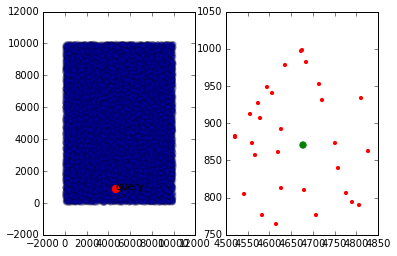

In [4]:
two_dimention_demo()

## 2. VPTREE on timeseries

In [5]:
def tsmaker(m, s, j):
    "returns metadata and a time series in the shape of a jittered normal"
    t = np.arange(0.0, 1.0, 0.01)
    v = norm.pdf(t, m, s) + j*np.random.randn(100)
    return (t, v)

In [19]:
mus = np.random.uniform(low=0.0, high=1.0, size=50)
sigs = np.random.uniform(low=0.05, high=0.4, size=50)
jits = np.random.uniform(low=0.05, high=0.2, size=50)

In [20]:
ts_set = [tsmaker(m, s, j) for i, m, s, j in zip(range(50), mus, sigs, jits)]

In [21]:
ts_set[0][1]

array([ 1.43636678,  1.53648462,  1.63318376,  1.47893536,  1.5230024 ,
        1.63664414,  1.58058818,  1.54182576,  1.51208697,  1.42626509,
        1.39236302,  1.4970802 ,  1.46408096,  1.35823105,  1.60464672,
        1.3421027 ,  1.31249844,  1.29012959,  1.39230085,  1.13227242,
        1.09272691,  1.30754081,  1.28467976,  1.00362096,  1.04673311,
        1.0294572 ,  0.94958945,  0.88662081,  1.22047184,  0.90778856,
        1.04040344,  1.00385389,  0.86021646,  0.7773346 ,  0.80553743,
        0.72428442,  0.44054682,  0.58726332,  0.7350303 ,  0.37113526,
        0.54020336,  0.6532306 ,  0.55322315,  0.20903506,  0.5064259 ,
        0.42545782,  0.16288799,  0.31762572,  0.33595803,  0.09184788,
        0.20890826,  0.15092027,  0.41043636,  0.16096917,  0.18832756,
       -0.13083457,  0.34313567,  0.08250197,  0.24598514,  0.13785501,
        0.07973979, -0.02898546, -0.04412287,  0.02487387,  0.09003012,
        0.20694731, -0.08998802,  0.08847292,  0.17289944,  0.11

In [22]:
def timeseries_demo():
    rn = lambda: random.randint(0, 10000)
    aset = [tsmaker(m, s, j) for i, m, s, j in zip(range(50), mus, sigs, jits)]
    q = tsmaker(mus[1], sigs[1], jits[1])
    rad = 9990
    distance = lambda a, b: math.sqrt(sum([((x-y)**2) for x, y in zip(a[1], b[1])]))

    s = time.time()
    print("creating vptree...")
    root = VpNode(aset, distance=distance)
    print("vptree created", time.time() - s)
    s = time.time()
    print("searching...")

    se = VpSearch(root, q, rad, 5)
    #out = se.search()
    out = se.knn()
    for k, v in sorted(se.stat.items()):
        print(k, v)

    print("number of resultes: %s s" % len(out))
    print("vptree search done", time.time() - s)
    
    plt.plot(q[1], label='original timeseries', linewidth=2)
    plt.plot(out[0][1], label='similar_1')
    plt.plot(out[1][1], label='similar_2')
    plt.plot(out[2][1], label='similar_3')
    plt.legend()
    plt.show()

creating vptree...
vptree created 0.03073287010192871
searching...
expanded 71
skipped level:2 1
skipped level:5 2
number of resultes: 5 s
vptree search done 0.011806011199951172


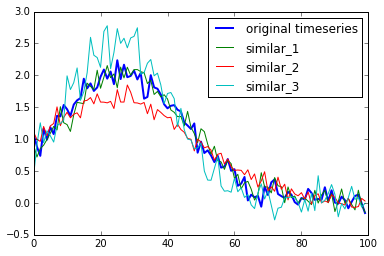

In [23]:
timeseries_demo()

## 3. VPTREE on text corpus

### Levenshtein Distance

In information theory and computer science, the Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (i.e. insertions, deletions or substitutions) required to change one word into the other. It is named after Vladimir Levenshtein, who considered this distance in 1965.[1]



In [4]:
def levenshtein(a,b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n

    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]


def main(file_name):
    f = open(file_name)
    next(f)
    aset = [w[:-1] for w in f]
    rad = 1

    distance = levenshtein

    s = time.time()
    print("\ninput set %s points" % len(aset))
    print("creating tree...")
    root = VpNode(aset, distance=distance)
    print("created: %s nodes" % VpNode.ids)
    print("done in s: %s" % (time.time() - s))
    print("searching...")
    while True:
        q = input(">>")
        s = time.time()
        se = VpSearch(root, q, rad, 10)
        out = se.knn()
        print(se.stat)
        print("founded %s results:" % len(out))
        
        count = 1

        print("\n".join(out))
        print("done in s: %s" % (time.time() - s))

*Note*:
Since the word dictionary is really large, the below function may take over 10 mins to run:

In [ ]:
main('wordsEn.txt')


input set 109582 points
creating tree...
created: count(219163) nodes
done in s: 170.24529600143433
searching...
>>success
{'skipped level:16': 3708, 'skipped level:5': 2, 'skipped level:6': 4, 'skipped level:8': 17, 'skipped level:4': 2, 'skipped level:13': 441, 'skipped level:9': 40, 'skipped level:12': 232, 'skipped level:10': 54, 'skipped level:11': 116, 'expanded': 46593, 'skipped level:17': 4302, 'skipped level:15': 1808, 'skipped level:14': 908, 'skipped level:7': 5}
founded 10 results:
success
access
duchess
succeed
succeeds
successes
successor
succors
suchness
suckers
done in s: 5.621294021606445
>>english
{'skipped level:16': 3688, 'skipped level:5': 2, 'skipped level:6': 2, 'skipped level:8': 10, 'skipped level:4': 1, 'skipped level:15': 1866, 'skipped level:9': 36, 'skipped level:12': 209, 'skipped level:10': 55, 'expanded': 44124, 'skipped level:11': 127, 'skipped level:3': 1, 'skipped level:13': 475, 'skipped level:17': 4239, 'skipped level:14': 945, 'skipped level:7': 6